In [55]:
import pandas as pd
import numpy as np
from collections import Counter
from unidecode import unidecode
import missingno as msno

In [56]:
datafolder = '../data/data-10k/'

In [57]:
name_basics= 'name.basics-10k.tsv'

In [58]:
df_namebasics = pd.read_csv(datafolder + name_basics, sep='\t', quoting = 3)

In [59]:
df_namebasics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0083922,tt0069467,tt0050976"


In [60]:
df_namebasics.dtypes

nconst               object
primaryName          object
birthYear            object
deathYear            object
primaryProfession    object
knownForTitles       object
dtype: object

In [81]:
df_null = df_namebasics.replace(r"\N", None ) 

<Axes: >

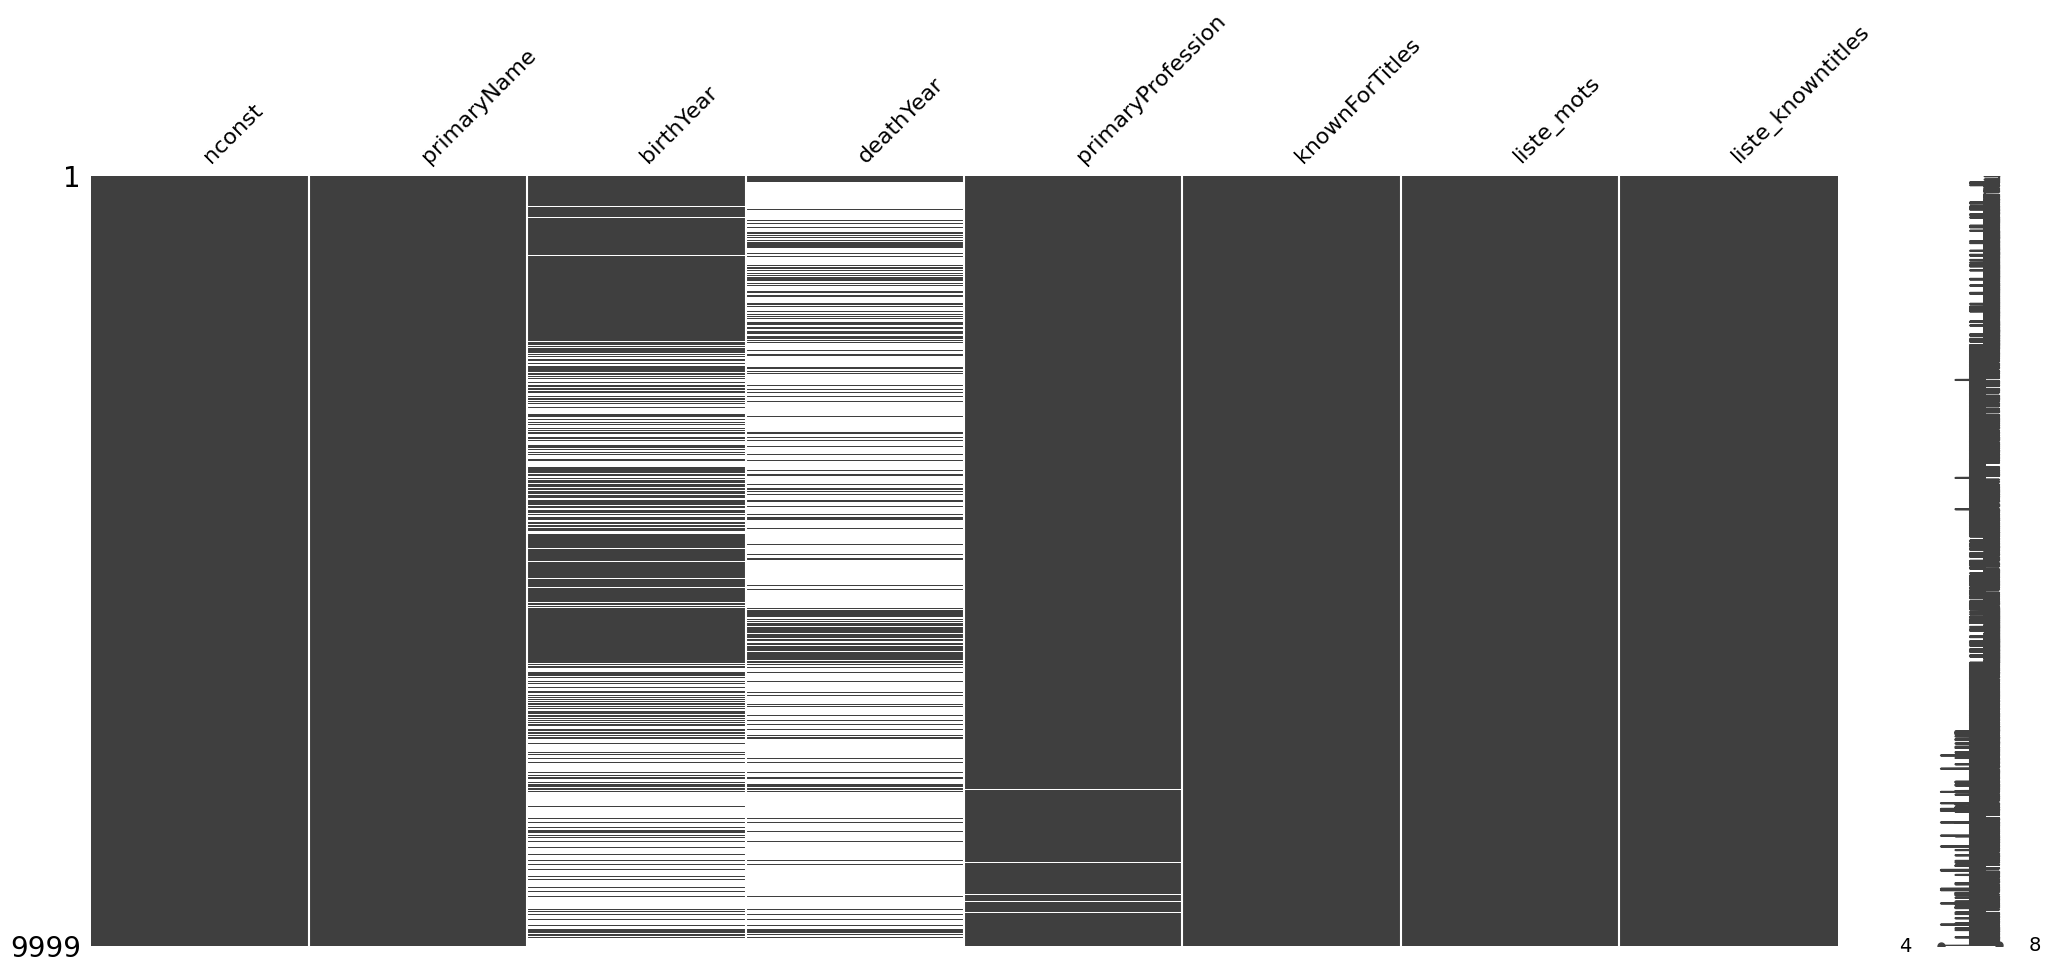

In [82]:

msno.matrix(df_null)

In [61]:
df_namebasics['birthYear'] = df_namebasics['birthYear'].replace(r'\\N', np.nan, regex=True)
df_namebasics['birthYear'] = pd.to_numeric(df_namebasics['birthYear'], errors='coerce')

In [62]:
df_namebasics["birthYear"].astype(float)

0       1899.0
1       1924.0
2       1934.0
3       1949.0
4       1918.0
         ...  
9994       NaN
9995       NaN
9996       NaN
9997       NaN
9998       NaN
Name: birthYear, Length: 9999, dtype: float64

In [63]:
df_namebasics['deathYear'] = df_namebasics['deathYear'].replace(r'\\N', np.nan, regex=True)
df_namebasics['deathYear'] = pd.to_numeric(df_namebasics['deathYear'], errors='coerce')
df_namebasics["birthYear"].astype(float)

0       1899.0
1       1924.0
2       1934.0
3       1949.0
4       1918.0
         ...  
9994       NaN
9995       NaN
9996       NaN
9997       NaN
9998       NaN
Name: birthYear, Length: 9999, dtype: float64

In [64]:
df_namebasics["nconst"].nunique()

9999

In [65]:
for col in df_namebasics.columns :
    df_namebasics["primaryName"] = df_namebasics["primaryName"].apply(lambda x: unidecode(x))

df_namebasics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0050986,tt0083922,tt0069467,tt0050976"


In [66]:
df_namebasics["primaryName"].nunique()

9883

In [67]:
print(df_namebasics[df_namebasics["primaryName"].duplicated()])

         nconst      primaryName  birthYear  deathYear  \
252   nm0000253     Robert Ellis     1888.0     1935.0   
1228  nm0001230    Harrison Ford     1884.0     1957.0   
1293  nm0001295    Graham Greene     1952.0        NaN   
2115  nm0002117   Paul Guilfoyle        NaN        NaN   
2210  nm0002213    Anders Bohman     1957.0        NaN   
...         ...              ...        ...        ...   
9821  nm0009992   Kevin Ackerman        NaN        NaN   
9839  nm0010011  Robert Ackerman        NaN        NaN   
9923  nm0010101     Jack Ackroyd        NaN        NaN   
9988  nm0010170    Carlos Acosta     1937.0     2010.0   
9989  nm0010171    Carlos Acosta        NaN        NaN   

                   primaryProfession                           knownForTitles  
252       art_director,miscellaneous  tt0010965,tt0014083,tt0026454,tt0014515  
1228           actor,archive_footage  tt0016251,tt0017344,tt0017201,tt0008351  
1293           actor,writer,producer  tt0120689,tt5362988,tt009

In [68]:
df_namebasics["birthYear"].sort_values(ascending =True)

635     1564.0
6308    1678.0
5568    1685.0
1923    1685.0
3694    1712.0
         ...  
9994       NaN
9995       NaN
9996       NaN
9997       NaN
9998       NaN
Name: birthYear, Length: 9999, dtype: float64

In [69]:
df_namebasics.iloc[635]

nconst                                                nm0000636
primaryName                                 William Shakespeare
birthYear                                                1564.0
deathYear                                                1616.0
primaryProfession                    writer,miscellaneous,actor
knownForTitles       tt10095582,tt20711868,tt8632012,tt14297038
Name: 635, dtype: object

In [70]:
df_namebasics["birthYear"].sort_values(ascending =False)

8886    1992.0
3089    1992.0
4869    1992.0
8918    1991.0
2796    1990.0
         ...  
9994       NaN
9995       NaN
9996       NaN
9997       NaN
9998       NaN
Name: birthYear, Length: 9999, dtype: float64

In [71]:
df_namebasics.iloc[3089]

nconst                                   nm0003096
primaryName                        Jennifer Harris
birthYear                                   1992.0
deathYear                                      NaN
primaryProfession                          actress
knownForTitles       tt0211423,tt0220114,tt0377263
Name: 3089, dtype: object

In [72]:
df_namebasics['liste_mots'] = df_namebasics['primaryProfession'].str.split(',')
df_namebasics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,liste_mots
0,nm0000001,Fred Astaire,1899.0,1987.0,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125","[actor, miscellaneous, producer]"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355","[actress, soundtrack, archive_footage]"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452","[actress, music_department, producer]"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723","[actor, writer, music_department]"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0050986,tt0083922,tt0069467,tt0050976","[writer, director, actor]"


In [73]:
count_primaryprofession = df_namebasics["liste_mots"].explode().tolist()

In [74]:
compte_mots = Counter(count_primaryprofession)
compte_mots

Counter({'actor': 3771,
         'producer': 3354,
         'director': 2288,
         'writer': 2282,
         'actress': 2034,
         'miscellaneous': 1404,
         'soundtrack': 1006,
         'music_department': 977,
         'composer': 898,
         'camera_department': 888,
         'archive_footage': 876,
         'cinematographer': 796,
         'assistant_director': 494,
         'art_department': 393,
         'editor': 390,
         'production_manager': 352,
         'editorial_department': 326,
         'sound_department': 326,
         'visual_effects': 230,
         'production_designer': 158,
         'art_director': 142,
         'music_artist': 136,
         'stunts': 120,
         'special_effects': 112,
         'location_management': 100,
         'casting_department': 99,
         'make_up_department': 96,
         'costume_department': 89,
         'script_department': 87,
         'executive': 80,
         'animation_department': 80,
         'casting_direct

In [75]:
df_namebasics['liste_knowntitles'] = df_namebasics['knownForTitles'].str.split(',')
df_namebasics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,liste_mots,liste_knowntitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125","[actor, miscellaneous, producer]","[tt0072308, tt0050419, tt0053137, tt0027125]"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355","[actress, soundtrack, archive_footage]","[tt0037382, tt0075213, tt0117057, tt0038355]"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452","[actress, music_department, producer]","[tt0057345, tt0049189, tt0056404, tt0054452]"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723","[actor, writer, music_department]","[tt0072562, tt0077975, tt0080455, tt0078723]"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0050986,tt0083922,tt0069467,tt0050976","[writer, director, actor]","[tt0050986, tt0083922, tt0069467, tt0050976]"


In [76]:
count_knownfortitles = df_namebasics["liste_knowntitles"].explode().tolist()

In [77]:
compte_titre_identique = Counter(count_knownfortitles)
compte_titre_identique

Counter({'\\N': 52,
         'tt0806910': 32,
         'tt0116629': 31,
         'tt0120201': 30,
         'tt0096542': 27,
         'tt0120903': 27,
         'tt0119094': 24,
         'tt0181689': 24,
         'tt0120591': 24,
         'tt0107290': 24,
         'tt0120685': 24,
         'tt0120338': 23,
         'tt0119654': 23,
         'tt0117731': 21,
         'tt0108778': 21,
         'tt0203009': 21,
         'tt0120738': 21,
         'tt0298814': 21,
         'tt0103064': 20,
         'tt0058796': 20,
         'tt0343818': 20,
         'tt0120647': 19,
         'tt0114814': 19,
         'tt0108757': 19,
         'tt0796366': 19,
         'tt0133152': 19,
         'tt1375666': 18,
         'tt0319262': 18,
         'tt0069658': 18,
         'tt0106079': 18,
         'tt0119488': 17,
         'tt0076759': 17,
         'tt0119116': 17,
         'tt0120891': 17,
         'tt0120915': 17,
         'tt0118749': 17,
         'tt0095016': 17,
         'tt0083658': 17,
         'tt011843

In [78]:
df_namebasics["primaryName"].str.findall(r"([^a-zA-Z0-9\s\-'.éáíóÿöýõüòèßçæôÂâäÖúñãøëÁïåØÅÓÉûà])").explode().value_counts()

primaryName
:    1
/    1
Name: count, dtype: int64

In [79]:
test = df_namebasics["primaryName"].str.contains(r"[^a-zA-Z0-9\s\-'.éáíóÿöýõüòèßçæôÂâäÖúñãøëÁïåØÅÓÉûà]", regex = True)

In [80]:
df_namebasics["primaryName"].loc[test]

7228    Angel 11:11
9400          AC/DC
Name: primaryName, dtype: object